In [123]:
# Cargar el dataset MNIST desde TensorFlow/Keras
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist

# Cargar el conjunto de entrenamiento y prueba
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Verificar las formas de los conjuntos de datos
print(f"Conjunto de entrenamiento imágenes: {train_images.shape}")
print(f"Conjunto de entrenamiento etiquetas: {train_labels.shape}")
print(f"Conjunto de prueba imágenes: {test_images.shape}")
print(f"Conjunto de prueba etiquetas: {test_labels.shape}")

Conjunto de entrenamiento imágenes: (60000, 28, 28)
Conjunto de entrenamiento etiquetas: (60000,)
Conjunto de prueba imágenes: (10000, 28, 28)
Conjunto de prueba etiquetas: (10000,)


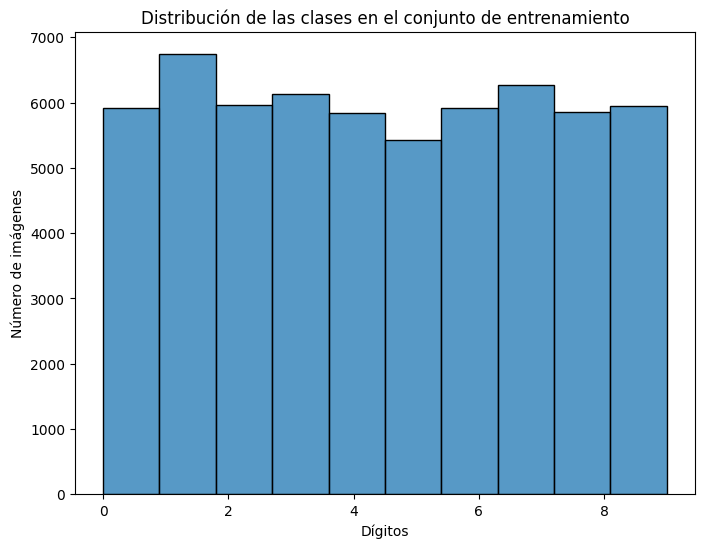

In [124]:
# Análisis de la distribución de las etiquetas (dígitos del 0 al 9)
plt.figure(figsize=(8, 6))
sns.histplot(train_labels, bins=10, kde=False)
plt.title('Distribución de las clases en el conjunto de entrenamiento')
plt.xlabel('Dígitos')
plt.ylabel('Número de imágenes')
plt.show()

In [ ]:
# Normalizar las imágenes de entrada (valor entre 0 y 1)
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Redimensionar las imágenes para que tengan una forma (28, 28, 1) para el modelo CNN
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Verificar las formas de las imágenes después del preprocesamiento
print(f"Conjunto de entrenamiento imágenes después de preprocesar: {train_images.shape}")
print(f"Conjunto de prueba imágenes después de preprocesar: {test_images.shape}")


Conjunto de entrenamiento imágenes después de preprocesar: (60000, 28, 28, 1)
Conjunto de prueba imágenes después de preprocesar: (10000, 28, 28, 1)


In [126]:
from tensorflow.keras import layers, models

# Crear el modelo CNN
model = models.Sequential()

# Capa de convolución: 32 filtros, tamaño del kernel (3, 3), activación ReLU
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Capa de max pooling: reduce las dimensiones espaciales
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))  # Dropout después de la primera capa convolucional

# Otra capa de convolución y max pooling
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Capa de convolución adicional
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Aplanar las características para la capa densa
model.add(layers.Flatten())

# Capa densa completamente conectada
model.add(layers.Dense(128, activation='relu'))

# Capa de salida: 10 neuronas para las 10 clases (0-9)
model.add(layers.Dense(10, activation='softmax'))

# Resumen del modelo
model.summary()

c:\Users\Alumno_AI\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,474 (431.54 KB)

 Trainable params: 110,474 (431.54 KB)

 Non-trainable params: 0 (0.00 B)

In [127]:
from tensorflow.keras.optimizers import Adam

# Ajustar el optimizador con una tasa de aprendizaje más baja
optimizer = Adam(learning_rate=0.0005)

# Compilar el modelo con el nuevo optimizador
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [128]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Crear un generador de datos para aumentar las imágenes
datagen = ImageDataGenerator(
    rotation_range=10,        # Rotar las imágenes
    width_shift_range=0.1,    # Desplazar imágenes horizontalmente
    height_shift_range=0.1,   # Desplazar imágenes verticalmente
    shear_range=0.1,          # Cizallar las imágenes
    zoom_range=0.1,           # Zoom
    horizontal_flip=False,    # No aplicar voltear horizontalmente (para MNIST)
    fill_mode='nearest'       # Rellenar los píxeles vacíos con el valor más cercano
)

# Ajustar el generador a las imágenes de entrenamiento
datagen.fit(train_images)

# Entrenar el modelo usando el generador de datos
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64), epochs=5, validation_data=(test_images, test_labels))


c:\Users\Alumno_AI\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.6885 - loss: 0.9519 - val_accuracy: 0.9595 - val_loss: 0.1330
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9253 - loss: 0.2419 - val_accuracy: 0.9735 - val_loss: 0.0838
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9437 - loss: 0.1780 - val_accuracy: 0.9781 - val_loss: 0.0768
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9533 - loss: 0.1455 - val_accuracy: 0.9820 - val_loss: 0.0557
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9568 - loss: 0.1333 - val_accuracy: 0.9807 - val_loss: 0.0583


In [129]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Precisión en el conjunto de prueba: {test_acc * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9757 - loss: 0.0729
Precisión en el conjunto de prueba: 98.07%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


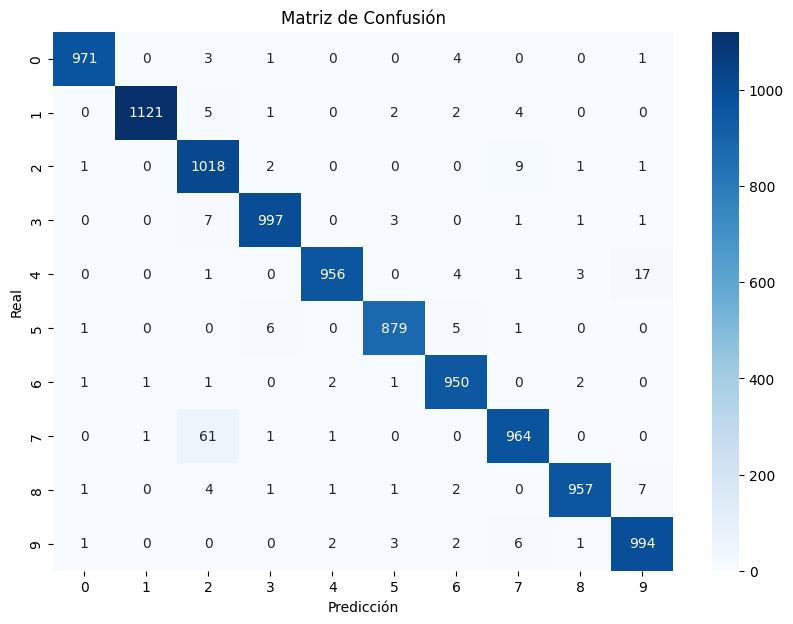

In [130]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Hacer predicciones en el conjunto de prueba
predictions = model.predict(test_images)
predicted_labels = predictions.argmax(axis=1)

# Calcular la matriz de confusión
cm = confusion_matrix(test_labels, predicted_labels)

# Mostrar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


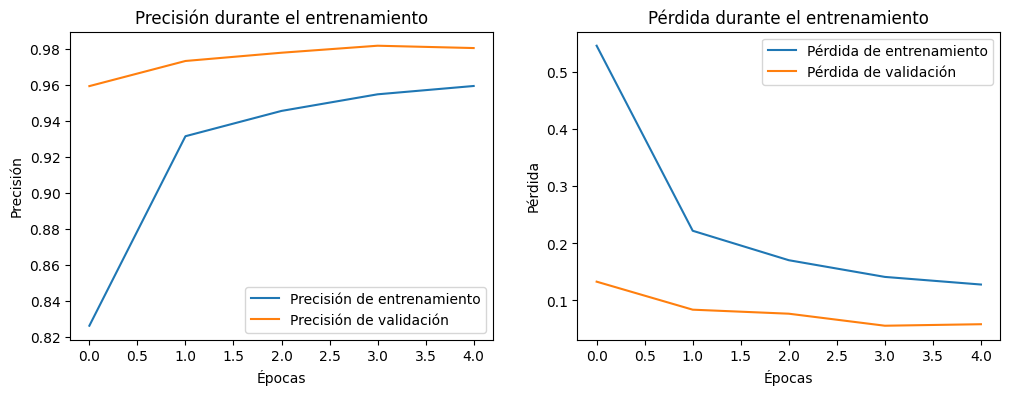

In [131]:
# Graficar la precisión y la pérdida durante el entrenamiento
plt.figure(figsize=(12, 4))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

In [132]:
# Hacer predicciones en el conjunto de prueba
predictions = model.predict(test_images)

# Ver el resultado para la primera imagen del conjunto de prueba
predicted_label = predictions[0].argmax()  # La clase con la mayor probabilidad
print(f"Predicción para la primera imagen: {predicted_label}")
print(f"Etiqueta real: {test_labels[0]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicción para la primera imagen: 7
Etiqueta real: 7


In [ ]:
# Guardar el modelo entrenado en formato .h5
model.save('modelo_simple.h5')  # Puedes cambiar por .keras

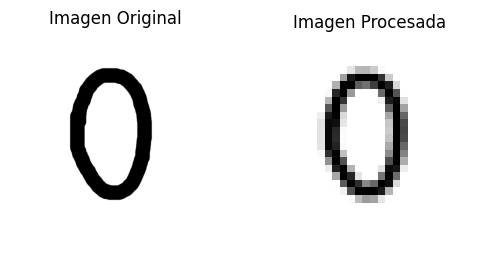

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
La imagen corresponde al dígito: 0
Dígito 0: 99.80%
Dígito 1: 0.00%
Dígito 2: 0.01%
Dígito 3: 0.00%
Dígito 4: 0.00%
Dígito 5: 0.00%
Dígito 6: 0.07%
Dígito 7: 0.00%
Dígito 8: 0.07%
Dígito 9: 0.06%


In [20]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np

# Cargar el modelo previamente guardado
model = load_model('modelo_simple.h5')  # Asegúrate de que la ruta sea correcta

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Función para preprocesar la imagen
def preprocess_image(image_path):
    # Abrir la imagen desde el sistema de archivos
    img = Image.open(image_path)

    # Mostrar la imagen original
    plt.figure(figsize=(6, 3))

    # Imagen original
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title("Imagen Original")
    plt.axis('off')  # Ocultar los ejes

    # Convertir a escala de grises
    img = img.convert('L')

    # Redimensionar la imagen a 28x28 píxeles (tamaño de entrada de la red)
    img = img.resize((28, 28))

    # Convertir la imagen a un array numpy y normalizarla (dividiendo por 255.0)
    img_array = np.array(img) / 255.0

    # Añadir una dimensión extra para que el array sea de forma (1, 28, 28, 1)
    img_array = img_array.reshape(1, 28, 28, 1)

    # Mostrar la imagen procesada
    plt.subplot(1, 2, 2)
    plt.imshow(img_array.reshape(28, 28), cmap='gray')  # Mostrar la imagen en 28x28
    plt.title("Imagen Procesada")
    plt.axis('off')  # Ocultar los ejes

    # Mostrar las imágenes
    plt.show()

    return img_array

# Ruta de la imagen en tu repositorio local
image_path = 'img/cero.png'  # Reemplaza con la ruta de la imagen en tu repositorio local

# Preprocesar la imagen
processed_image = preprocess_image(image_path)

# Realizar la predicción
prediction = model.predict(processed_image)

# Obtener la clase predicha (el dígito)
predicted_class = np.argmax(prediction)

# Mostrar el resultado
print(f'La imagen corresponde al dígito: {predicted_class}')

# Mostrar las probabilidades para cada clase (los vectores de probabilidad)
for i in range(10):
    print(f'Dígito {i}: {prediction[0][i]*100:.2f}%')
